In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
plt.style.use('ggplot')
np.random.seed(123)

In [4]:
p_trans = np.zeros([3,3]) # Aくんの場所の遷移行列

In [7]:
# 0: office, 1: rest room, 2: Lab
p_trans[0, 0] = 0.1
p_trans[0, 1] = 0.2
p_trans[0, 2] = 0.7
p_trans[1, 0] = 0.1
p_trans[1, 1] = 0.4
p_trans[1, 2] = 0.5
p_trans[2, 0] = 0.3
p_trans[2, 1] = 0.3
p_trans[2, 2] = 0.4
p_trans

array([[0.1, 0.2, 0.7],
       [0.1, 0.4, 0.5],
       [0.3, 0.3, 0.4]])

In [8]:
NMCS = 400 # ステップ数
c_state = 0 
c_arr = [c_state]

for i in range(NMCS):
    # 0, 1, 2 からp_transの確率分布に従い1つ選ぶ
    current = np.random.choice(3, 1, p = p_trans[c_state, :])
    
    c_state = current[0]
    c_arr.append(c_state) # 現在の居場所を記録していく

df = pd.DataFrame(c_arr)

In [9]:
df.head()

,0
0,0
1,2
2,0
3,1
4,2


Text(0, 0.5, 'place')

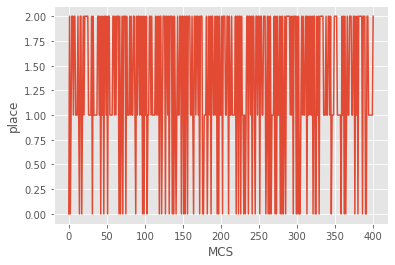

In [10]:
plt.plot(df[0])
plt.xlabel("MCS")
plt.ylabel("place")

A君は2. Labにいる可能性が高そう

/Users/komatsu/programing/python/bayes_stat_intro/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


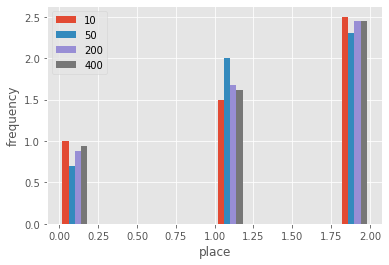

In [12]:
plt.hist([df[0][:10], df[0][:50], df[0][:200], df[0][:400]], 
         normed=True, label=["10", "50", "200", "400"])
plt.xlabel("place")
plt.ylabel("frequency")
plt.legend()

ステップが200から400になった時，ヒストグラムにあまり変化がない．  
このことから，このマルコフ連鎖は定常分布に収束していると言える．